In [1]:
from PIL import Image, ImageEnhance, ImageOps
def enhance_contrast_and_threshold(img, threshold=128):
    # Enhance contrast
    enhancer = ImageEnhance.Contrast(img)
    enhanced_img = enhancer.enhance(2.0)  # Adjust the factor as needed

    # Convert to grayscale and apply binary threshold
    bw = ImageOps.grayscale(enhanced_img)
    bw = bw.point(lambda p: p > threshold and 255)

    return bw

In [4]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from PIL import Image, ImageEnhance, ImageOps

# Set the path to the root directory
root_path = r"C:\Users\ezgi\Desktop\'23-'24 fall\deep learning\term project\b"
images = []
labels = []

valid_extensions = {".jpg", ".jpeg", ".png"}

for folder_name in os.listdir(root_path):
    folder_path = os.path.join(root_path, folder_name)
    if os.path.isdir(folder_path):
        for file_name in os.listdir(folder_path):
            if any(file_name.lower().endswith(ext) for ext in valid_extensions):
                image_path = os.path.join(folder_path, file_name)
                # Extract label from the file name (assuming the label is the third part split by underscores)
                label = file_name.split('_')[1]
                
                # Load the image using PIL
                pil_image = Image.open(image_path)

                # Enhance contrast and apply threshold
                enhanced_image = enhance_contrast_and_threshold(pil_image)

                # Convert PIL image to NumPy array
                img = np.array(enhanced_image)

                if img is None:
                    print(f"Failed to load image: {image_path}")
                else:
                    img = cv2.resize(img, (64, 64))  # Resize the image to a consistent size
                    images.append(img)
                    labels.append(label)

# Convert lists to numpy arrays
images = np.array(images)
labels = np.array(labels)

# Reshape images for compatibility with Conv2D layer
images = images.reshape(images.shape + (1,))

print("Number of images:", len(images))  # Add this line
print("Number of labels:", len(labels))  # Add this line

# Encode labels into numerical format
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

# Normalize pixel values to be between 0 and 1
images = images / 255.0

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels_encoded, test_size=0.2, random_state=42)

# Define the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))  # Use softmax for multi-class classification

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss:.4f}, Test accuracy: {accuracy * 100:.2f}%')


Number of images: 6986
Number of labels: 6986
Epoch 1/10
175/175 [==============================] - 12s 66ms/step - loss: 4.0263 - accuracy: 0.0460 - val_loss: 3.7784 - val_accuracy: 0.0901
Epoch 2/10
175/175 [==============================] - 11s 65ms/step - loss: 3.2082 - accuracy: 0.2038 - val_loss: 2.9538 - val_accuracy: 0.2711
Epoch 3/10
175/175 [==============================] - 11s 64ms/step - loss: 2.3607 - accuracy: 0.3814 - val_loss: 2.5771 - val_accuracy: 0.3455
Epoch 4/10
175/175 [==============================] - 11s 64ms/step - loss: 1.7702 - accuracy: 0.5161 - val_loss: 2.3911 - val_accuracy: 0.3977
Epoch 5/10
175/175 [==============================] - 11s 64ms/step - loss: 1.3597 - accuracy: 0.6188 - val_loss: 2.3334 - val_accuracy: 0.4299
Epoch 6/10
175/175 [==============================] - 11s 64ms/step - loss: 1.0278 - accuracy: 0.7090 - val_loss: 2.4606 - val_accuracy: 0.4392
Epoch 7/10
175/175 [==============================] - 11s 64ms/step - loss: 0.7521 - accur

In [3]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Set the path to the root directory
root_path = r"C:\Users\ezgi\Desktop\'23-'24 fall\deep learning\term project\b"
images = []
labels = []

valid_extensions = {".jpg", ".jpeg", ".png"}

for folder_name in os.listdir(root_path):
    folder_path = os.path.join(root_path, folder_name)
    if os.path.isdir(folder_path):
        for file_name in os.listdir(folder_path):
            if any(file_name.lower().endswith(ext) for ext in valid_extensions):
                image_path = os.path.join(folder_path, file_name)
                # Extract label from the file name (assuming the label is the third part split by underscores)
                label = file_name.split('_')[1]
                img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
                if img is None:
                    print(f"Failed to load image: {image_path}")
                else:
                    img = cv2.resize(img, (64, 64))  # Resize the image to a consistent size
                    images.append(img)
                    labels.append(label)

# Convert lists to numpy arrays
images = np.array(images)
labels = np.array(labels)

print("Number of images:", len(images))  # Add this line
print("Number of labels:", len(labels))  # Add this line


# Encode labels into numerical format
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

# Normalize pixel values to be between 0 and 1
images = images / 255.0

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels_encoded, test_size=0.2, random_state=42)

# Define the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))  # Use softmax for multi-class classification

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss:.4f}, Test accuracy: {accuracy * 100:.2f}%')

AttributeError: 'numpy.ndarray' object has no attribute 'convert'

1/1 [==============================] - 0s 63ms/step


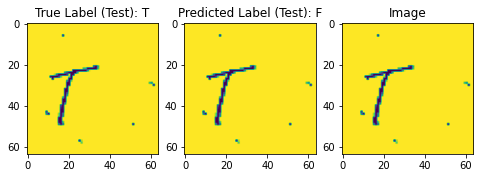

1/1 [==============================] - 0s 44ms/step


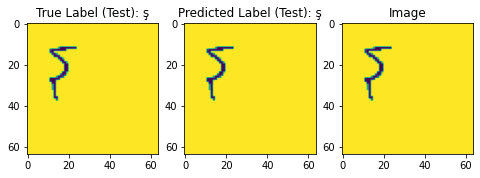

1/1 [==============================] - 0s 43ms/step


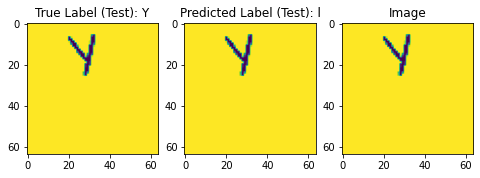

1/1 [==============================] - 0s 37ms/step


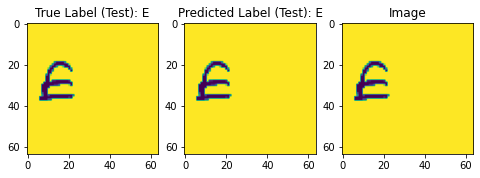

1/1 [==============================] - 0s 34ms/step


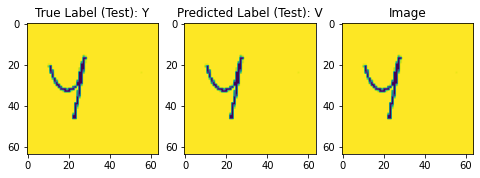

In [7]:
import matplotlib.pyplot as plt
import random

"""# Plot 5 random examples from the training set
for i in range(5):
    index_train = random.randint(0, len(X_train) - 1)

    # Make prediction on the selected sample from the training set
    prediction_train = model.predict(X_train[index_train:index_train+1])
    predicted_label_train = np.argmax(prediction_train)

    # Display true label, predicted label, and the image itself
    plt.figure(figsize=(8, 4))

    # True label
    plt.subplot(1, 3, 1)
    plt.title(f'True Label (Train): {label_encoder.classes_[y_train[index_train]]}')
    plt.imshow(X_train[index_train])

    # Predicted label
    plt.subplot(1, 3, 2)
    plt.title(f'Predicted Label (Train): {label_encoder.classes_[predicted_label_train]}')
    plt.imshow(X_train[index_train])

    # Image itself
    plt.subplot(1, 3, 3)
    plt.title('Image')
    plt.imshow(X_train[index_train])

    plt.show()"""

# Plot 5 random examples from the test set
for i in range(5):
    index_test = random.randint(0, len(X_test) - 1)

    # Make prediction on the selected sample from the test set
    prediction_test = model.predict(X_test[index_test:index_test+1])
    predicted_label_test = np.argmax(prediction_test)

    # Display true label, predicted label, and the image itself
    plt.figure(figsize=(8, 4))

    # True label
    plt.subplot(1, 3, 1)
    plt.title(f'True Label (Test): {label_encoder.classes_[y_test[index_test]]}')
    plt.imshow(X_test[index_test])

    # Predicted label
    plt.subplot(1, 3, 2)
    plt.title(f'Predicted Label (Test): {label_encoder.classes_[predicted_label_test]}')
    plt.imshow(X_test[index_test])

    # Image itself
    plt.subplot(1, 3, 3)
    plt.title('Image')
    plt.imshow(X_test[index_test])

    plt.show()


In [ ]:
import matplotlib.pyplot as plt
import random

# Make predictions on the entire training set
predictions_train = model.predict(X_train)
predicted_labels_train = np.argmax(predictions_train, axis=1)

# Find indices of incorrectly predicted samples
incorrect_indices_train = np.where(predicted_labels_train != y_train)[0]

# Plot 5 random examples from the training set that were predicted wrong
for i in range(5):
    index_train = random.choice(incorrect_indices_train)

    # Make prediction on the selected sample from the training set
    prediction_train = model.predict(X_train[index_train:index_train+1])
    predicted_label_train = np.argmax(prediction_train)

    # Display true label, predicted label, and the image itself
    plt.figure(figsize=(8, 4))

    # True label
    plt.subplot(1, 3, 1)
    plt.title(f'True Label (Train): {label_encoder.classes_[y_train[index_train]]}')
    plt.imshow(X_train[index_train])

    # Predicted label
    plt.subplot(1, 3, 2)
    plt.title(f'Predicted Label (Train): {label_encoder.classes_[predicted_label_train]}')
    plt.imshow(X_train[index_train])

    # Image itself
    plt.subplot(1, 3, 3)
    plt.title('Image')
    plt.imshow(X_train[index_train])

    plt.show()


In [7]:
%pip install PIL

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement PIL (from versions: none)
ERROR: No matching distribution found for PIL


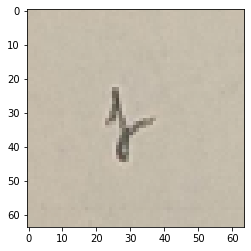

In [6]:
resized_image = cv2.resize(X_train[50], (64, 64))
plt.imshow(resized_image)
plt.show()